In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd

In [3]:
torch.tensor(4)

tensor(4)

In [4]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [5]:
ten1=torch.tensor([1,2,3,4])

In [6]:
ten1.shape #查看尺寸

torch.Size([4])

In [7]:
ten1.dtype #查看类型

torch.int64

## 求导机制

In [8]:
ten1.grad

In [9]:
print(ten1.grad)

None


In [10]:
x=torch.tensor([2.0],requires_grad=True)  #可以进行梯度回传
k=torch.tensor([5.0],requires_grad=True) 
print('反向传播前：',x.grad,k.grad)
y=k*x  #根据给定的数据，设计一个函数
y.backward()
print('反向传播后：',x.grad,k.grad)

反向传播前： None None
反向传播后： tensor([5.]) tensor([2.])


In [11]:
#y.backward()要清空，否则积累，会报错

In [12]:
y=k*x
y.backward

<bound method Tensor.backward of tensor([10.], grad_fn=<MulBackward0>)>

In [13]:
x=torch.randn(100)
y=8*x+9

In [14]:
#初始化参数
k=torch.tensor([0.0],requires_grad=True) 
b=torch.tensor([0.0],requires_grad=True) 
y_pre=k*x+b
def loss(y,y_pre):
    return torch.sum(torch.square(y-y_pre))/len(y)

err=loss(y,y_pre)

#反向梯度回传
err.backward()
#设置学习速率
lr=0.02
# 更新参数
k.data-=lr*k.grad   #k=k-lr*k.grad
b.data-=lr*b.grad
print(k.grad)
print(b.grad)
#更新梯度
k.grad.data.zero_()
b.grad.data.zero_()
print(k.grad)
print(b.grad)

tensor([-13.8802])
tensor([-16.8943])
tensor([0.])
tensor([0.])


## 循环迭代

In [15]:
#初始化参数
k=torch.tensor([0.0],requires_grad=True) 
b=torch.tensor([0.0],requires_grad=True) 
#设置学习速率
lr=0.02
Err=[]
for i in range(1000):
    y_pre=k*x+b
    err=loss(y,y_pre)
    err.backward()
    # 更新参数
    k.data-=lr*k.grad   #k=k-lr*k.grad
    b.data-=lr*b.grad
    k.grad.data.zero_()
    b.grad.data.zero_()
    Err.append(err.item())
    if i%100==0:
        print(i,'代：','k:',k.item(),'b=',b.item(),'误差值:',err.item())

0 代： k: 0.27760347723960876 b= 0.3378857374191284 误差值: 131.54498291015625
100 代： k: 7.782292366027832 b= 8.804706573486328 误差值: 0.08293817192316055
200 代： k: 7.994132995605469 b= 8.995355606079102 误差值: 5.416772182798013e-05
300 代： k: 7.999845027923584 b= 8.999885559082031 误差值: 3.579322438440613e-08
400 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10
500 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10
600 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10
700 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10
800 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10
900 代： k: 7.999993324279785 b= 8.999988555908203 误差值: 1.6217427400988527e-10


In [16]:
#pip install matplotlib

In [17]:
#pip install pandas

<function matplotlib.pyplot.show(close=None, block=None)>

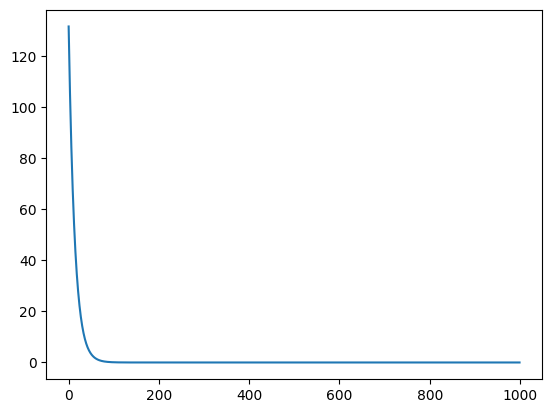

In [18]:
import matplotlib.pyplot as plt
plt.plot(Err)
plt.show